# Advanced Visualization

In [25]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('fivethirtyeight')

## WordCloud

In [26]:
from PIL import Image
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
print('Workcloud is installed and imported')

Defaulting to user installation because normal site-packages is not writeable
Workcloud is installed and imported


In [29]:
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -O alice_novel.txt
alice_novel = open('alice_novel.txt', 'r').read()
print ('File downloaded and saved')

File downloaded and saved


In [30]:
type(alice_novel)

str

In [31]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [32]:
alice_wordcloud = WordCloud(
    background_color= 'black', 
    max_words=2000,
    stopwords=stopwords
)
alice_wordcloud.generate(alice_novel)

(-0.5, 399.5, 199.5, -0.5)

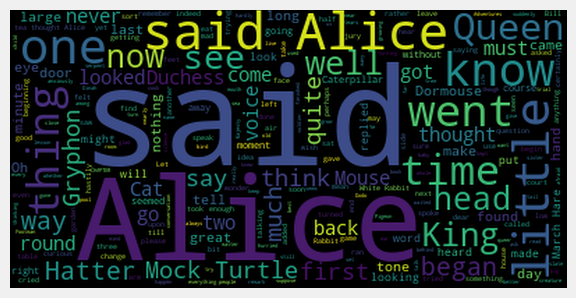

In [33]:
plt.imshow(alice_wordcloud, interpolation='lanczos')
plt.axis ('off')

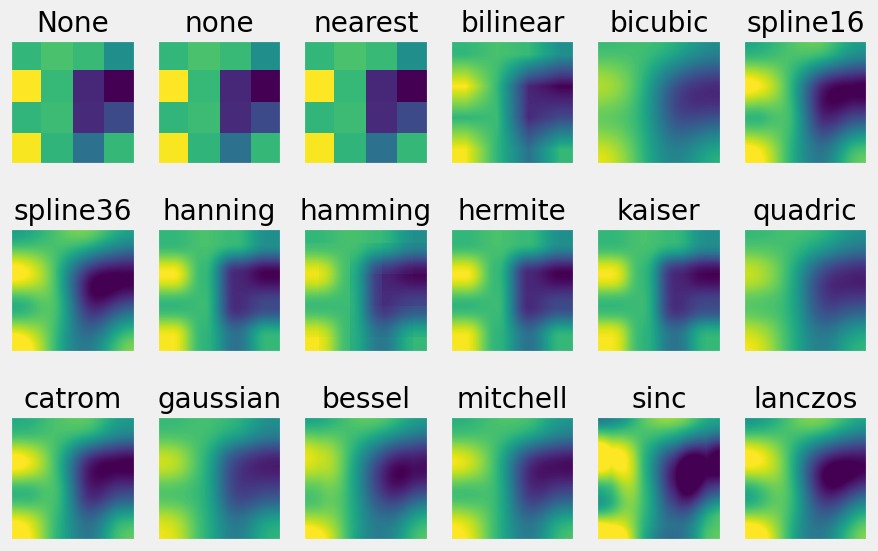

In [34]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
np.random.seed(19680801)

grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()

In [35]:
grid

array([[0.7003673 , 0.74275081, 0.70928001, 0.56674552],
       [0.97778533, 0.70633485, 0.24791576, 0.15788335],
       [0.69769852, 0.71995667, 0.25774443, 0.34154678],
       [0.96876117, 0.6945071 , 0.46638326, 0.7028127 ]])

(-0.5, 399.5, 199.5, -0.5)

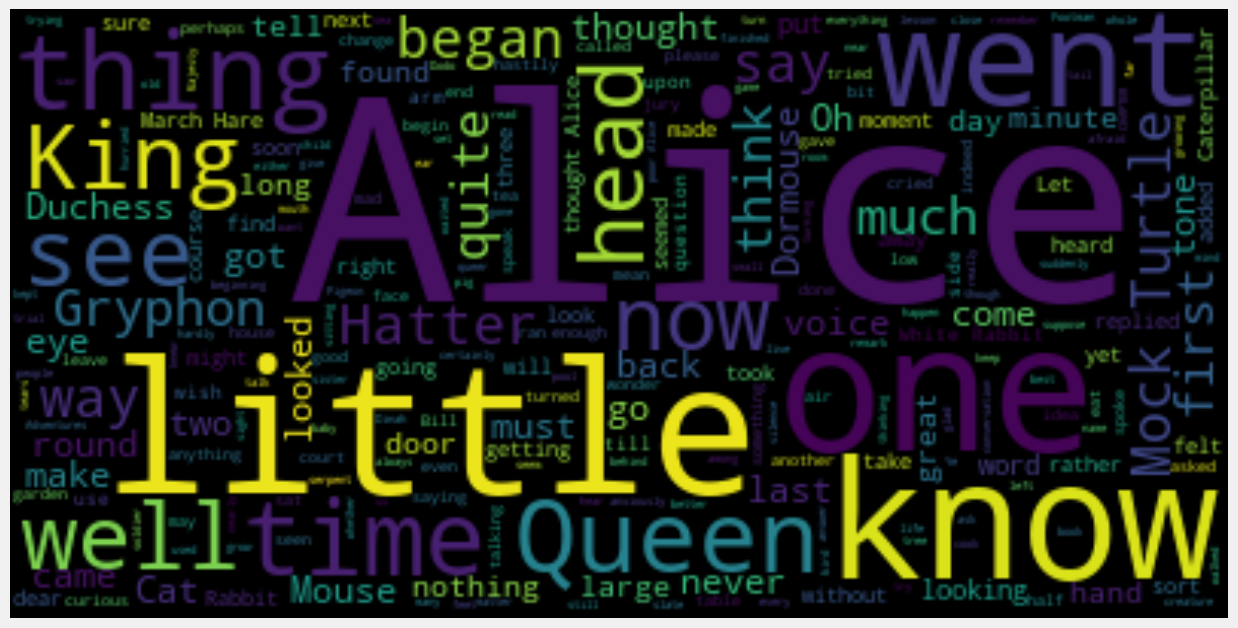

In [36]:
stopwords.add('said')
alice_wordcloud.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wordcloud, interpolation='bilinear')
plt.axis('off')

- ### Masking

In [40]:
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_mask.png -O alice_mask.png
alice_mask = np.array(Image.open('alice_mask.png'))

print('File downloaded and saved')

File downloaded and saved


In [41]:
alice_mask[400:501, 400:501]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

(-0.5, 899.5, 899.5, -0.5)

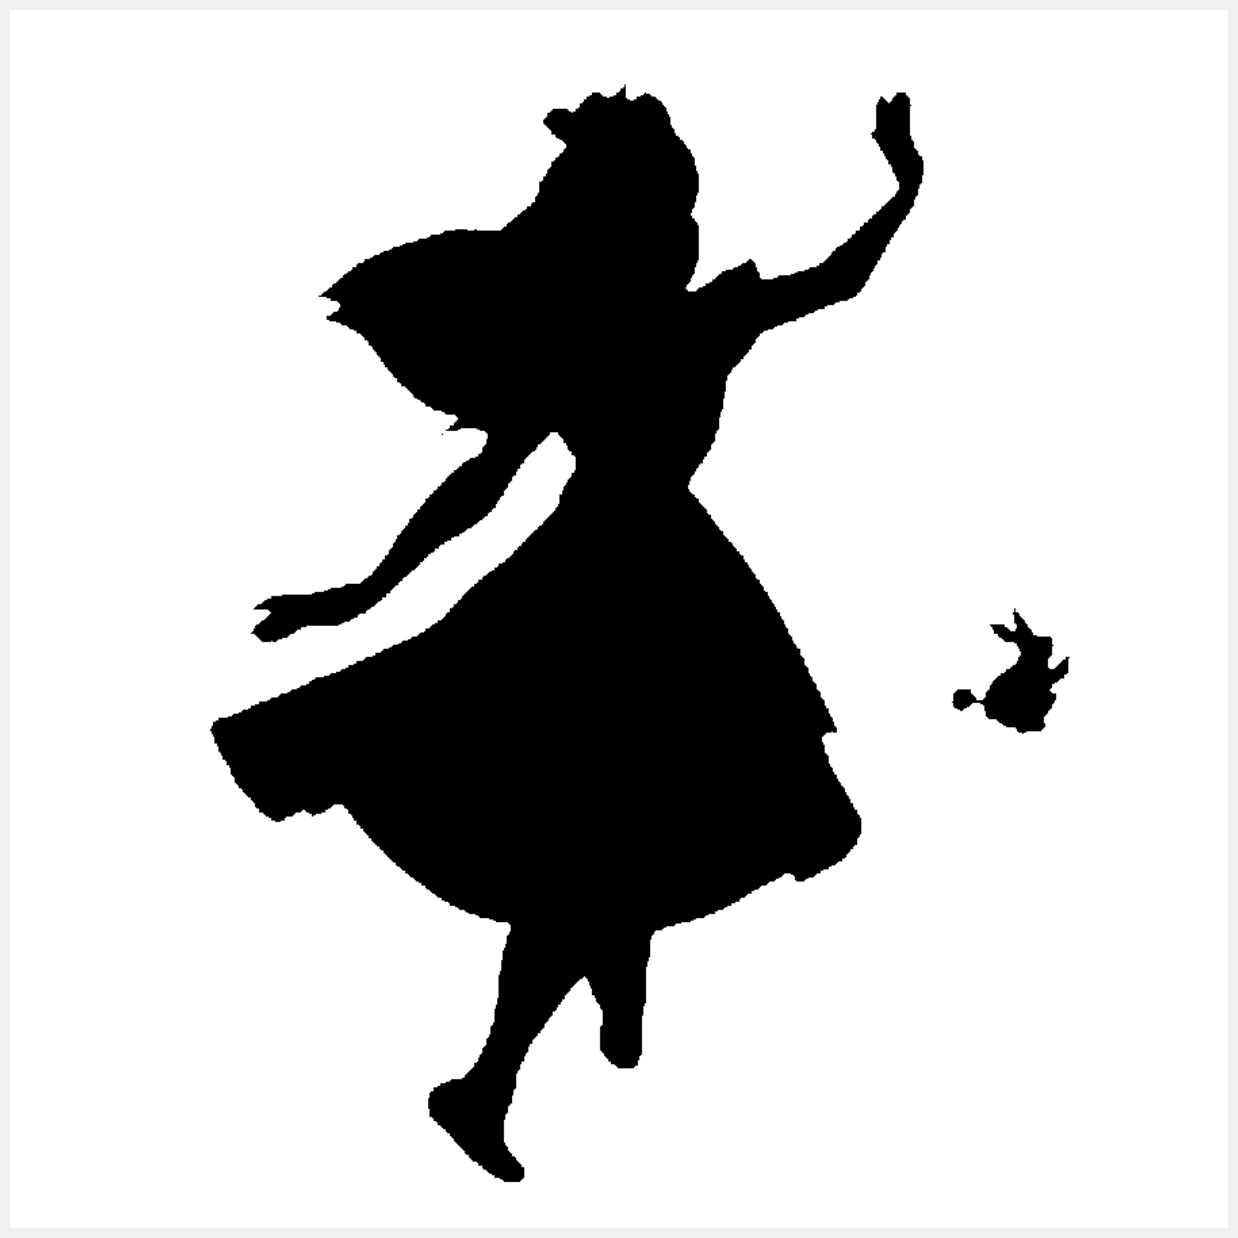

In [44]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')

(-0.5, 899.5, 899.5, -0.5)

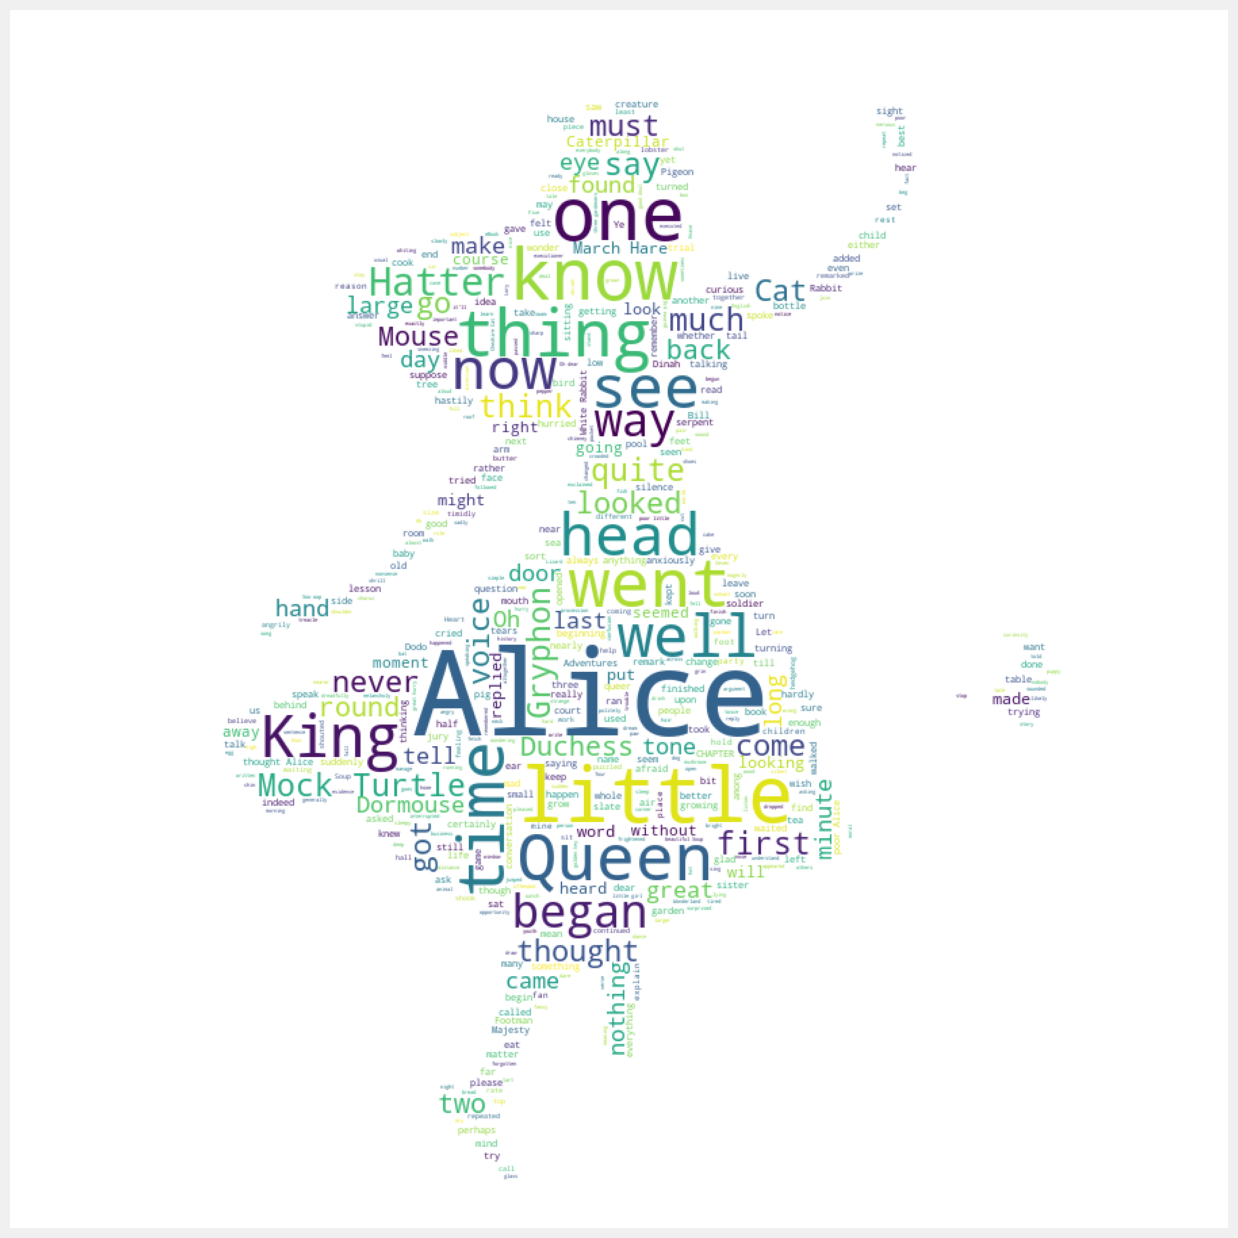

In [47]:
alice_wordcloud = WordCloud(
    background_color= 'white',
    max_words=2000,
    stopwords=stopwords,
    mask=alice_mask

)
alice_wordcloud.generate(alice_novel)
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wordcloud, interpolation='hamming')
plt.axis('off')

In [48]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true', 
                       sheet_name='Canada by Citizenship', 
                       skiprows=range(20),
                       skipfooter=2)

In [54]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [56]:
years

range(1980, 2014)

In [57]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [58]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    if len (country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country,'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ')* repeat_num_times)
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [59]:
wodcloud = WordCloud(background_color='white').generate(word_string)
print('Word cloud created')

Word cloud created


(-0.5, 399.5, 199.5, -0.5)

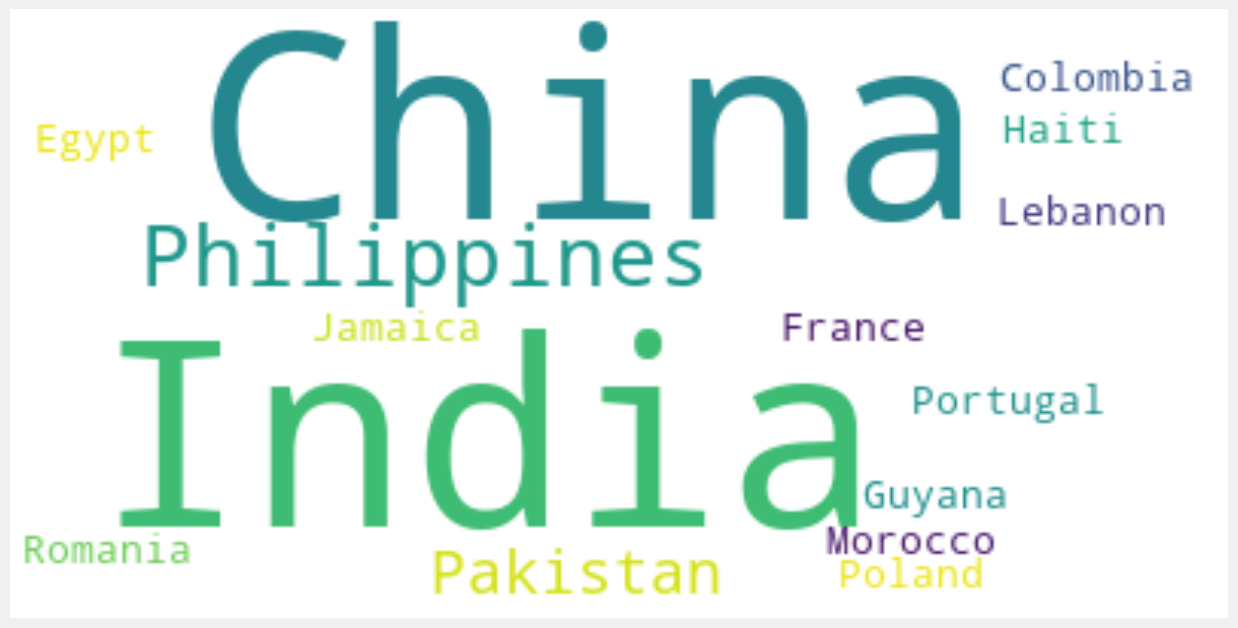

In [60]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(wodcloud, interpolation='bilinear')
plt.axis('off')


## Regresion Plots

In [63]:
%pip install seaborn
import seaborn as sns
print('Seaborn installed and imported')

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Seaborn installed and imported


In [ ]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [61]:
total_immigrants = pd.DataFrame(df_can[years].sum(axis=0))
total_immigrants.reset_index(inplace=True)
total_immigrants.columns = ['Year', 'Total']
total_immigrants.head()

,Year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


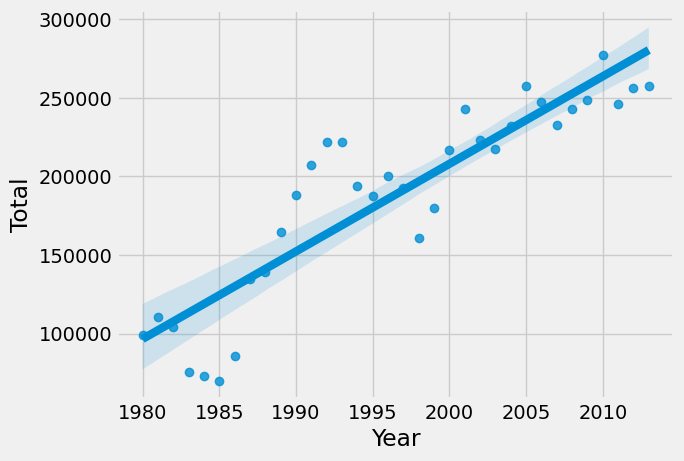

In [64]:
ax = sns.regplot(x = 'Year', y='Total', data=total_immigrants)

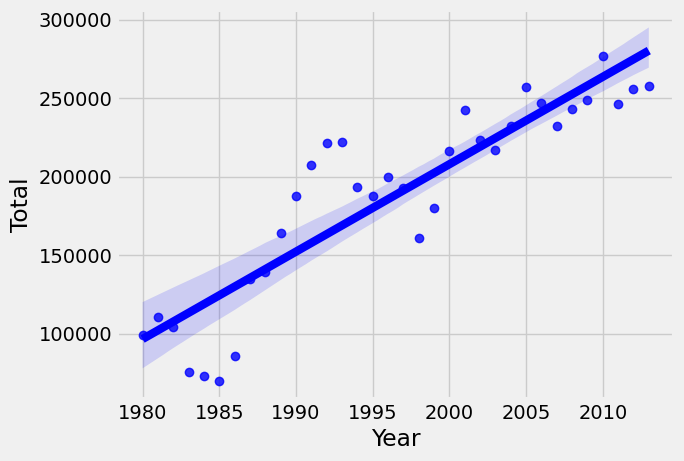

In [65]:
ax = sns.regplot(x = 'Year', y='Total', data=total_immigrants, color='blue')

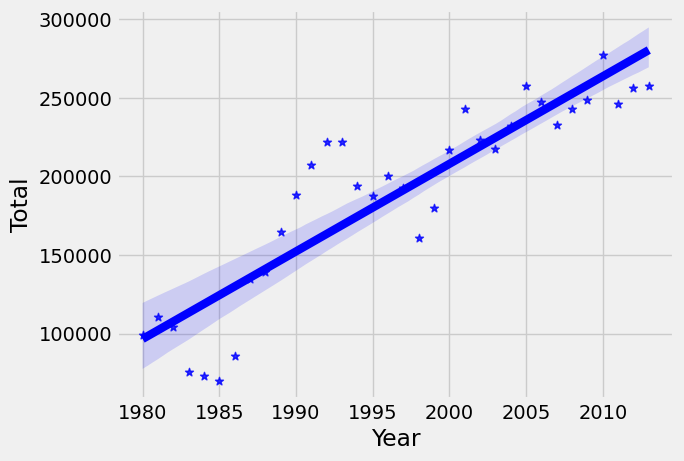

In [66]:
ax = sns.regplot(x = 'Year', y='Total', data=total_immigrants, color='blue', marker='*')

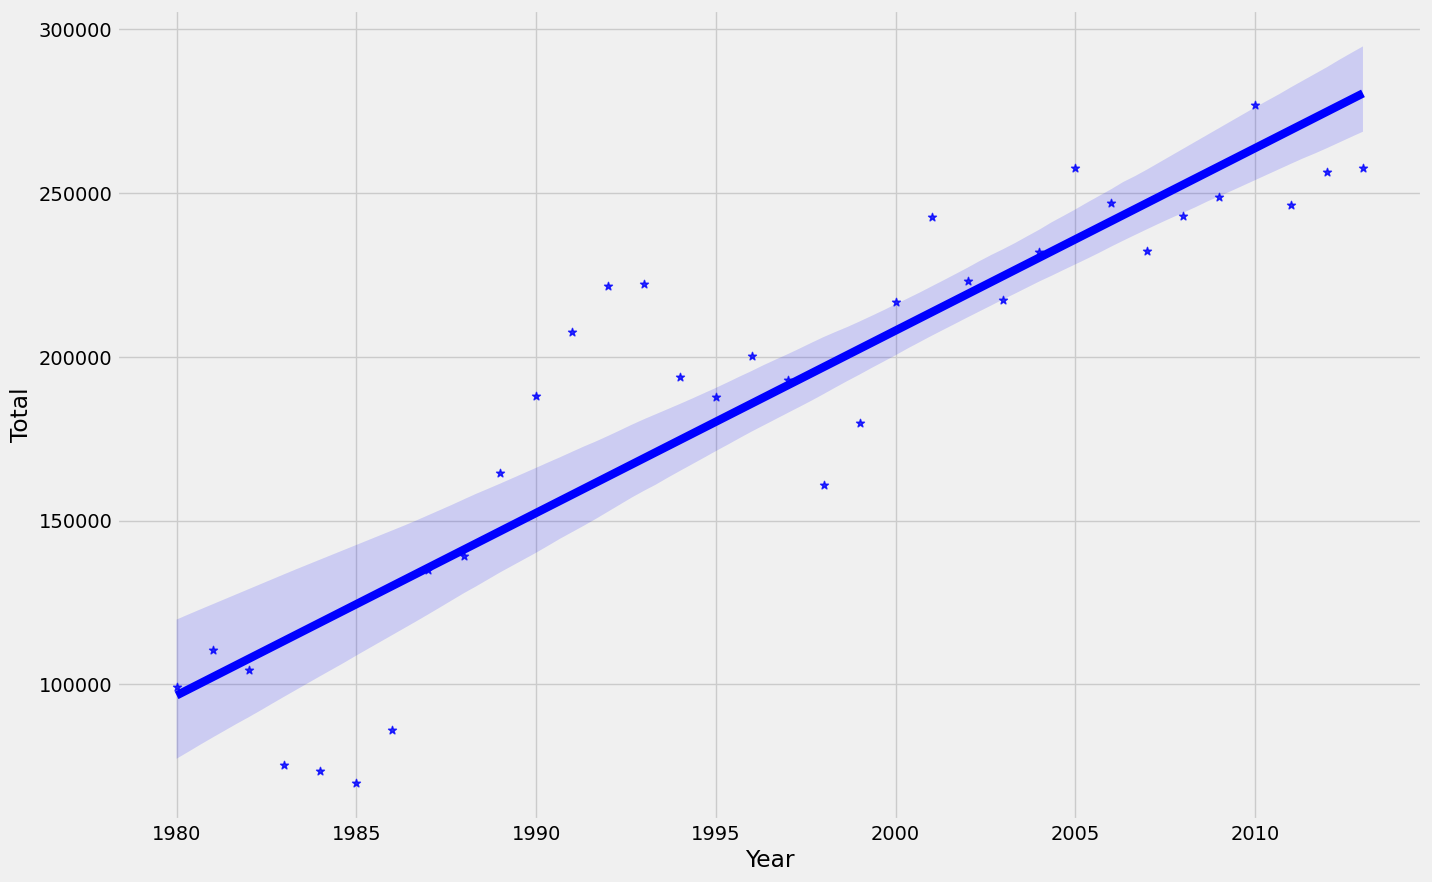

In [67]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='Year', y='Total', data=total_immigrants, color='blue', marker='*')

## Folium

In [68]:
%pip install folium
import folium

print('Folium installed and imported')

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Folium installed and imported


In [ ]:
world_map = folium.Map()
world_map

In [ ]:
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=10)
world_map

In [ ]:
world_map = folium.Map(location=[-6.2667330, 106.1120984], zoom_start=15)
world_map

### A. Stamen Toner Maps

In [ ]:
world_map = folium.Map(location=[-6.9934021, 110.3399887], zoom_start=13, tiles='Stamen Toner')
world_map

### B. Stamen Terrain Maps

In [ ]:
world_map = folium.Map(location=[-6.9934021, 110.3399887], zoom_start=13, tiles='Stamen Terrain')
world_map

### Maps with Markers

In [69]:
incident_data = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv")

In [71]:
incident_data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [73]:
limit = 100
incident_data = incident_data.loc[0:limit, :]

In [74]:
latitude = 37.77
longitude = -122.43

In [76]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
sanfran_map

In [77]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(incident_data.Y, incident_data.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='blue',
            fill=True,
            fill_color = 'red',
            fill_opacity=0.6
        )
    )
sanfran_map.add_child(incidents)

In [80]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(incident_data.Y, incident_data.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='blue',
            fill=True,
            fill_color = 'red',
            fill_opacity=0.6
        )
    )
langitudes = list(incident_data['Y'].values)
longitudes = list(incident_data['X'].values)
labels = list(incident_data['Category'].values)

for lat, lng, label in zip (langitudes,longitudes, labels):
    folium.Marker(
        [lat,lng],
        popup=label
    ).add_to(sanfran_map)
sanfran_map.add_child(incidents)

In [86]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
for lat, lng, label in zip(incident_data.Y, incident_data.X, incident_data.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        popup=label,
        fill_color = 'red',
        fill_opacity=0.6
    ).add_to(sanfran_map)

sanfran_map

In [88]:
from folium import plugins

sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

incidents = plugins.MarkerCluster().add_to(sanfran_map)

for lat, lng, label in zip(incident_data.Y, incident_data.X, incident_data.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)
sanfran_map

## Choropleth 

In [89]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [93]:
df_can.reset_index('Country', inplace=True)

In [94]:
df_can.head(3)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [95]:
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json
print('GeoJSON file downloaded')

GeoJSON file downloaded


In [102]:
world_geo = r'world_countries.json'
world_map= folium.Map(location=[0,0], zoom_start=2)

world_map.choropleth(
    geo_data = world_geo,
    data = df_can,
    columns=['Country', 'Total'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'

)
world_map

/Users/apple/Library/Python/3.8/lib/python/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
